# Logistic Regression 
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

***This notebook is Logistic Regression implementation in R language to build logistic regression classifier***


In [1]:
# Importing Data 
train_keep_outlier <- read.csv("train_keep_outlier.csv")
test_keep_outlier <- read.csv("test_keep_outlier.csv")
oos_keep_outlier <- read.csv("oos_keep_outlier.csv")
train_remove_outlier <- read.csv("train_remove_outlier.csv")
test_remove_outlier <- read.csv("test_remove_outlier.csv")
oos_remove_outlier <- read.csv("oos_remove_outlier.csv")


In [3]:
#Set factor column in the datasets
train_remove_outlier$df.output<- factor(train_remove_outlier$df.output)
test_remove_outlier$df.output<- factor(test_remove_outlier$df.output)
oos_remove_outlier$df.output<-factor(oos_remove_outlier$df.output)


In [6]:
# Training the model 

log.model1<-glm (formula = df.output~., family = binomial (link ="logit"), data = train_remove_outlier) 
summary(log.model1)



Call:
glm(formula = df.output ~ ., family = binomial(link = "logit"), 
    data = train_remove_outlier)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1984  -1.1528   0.7451   1.0421   2.8199  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.194583   0.100044  11.941  < 2e-16 ***
lepton_pT                -0.261077   0.015216 -17.158  < 2e-16 ***
lepton_eta               -0.057761   0.014710  -3.927 8.61e-05 ***
lepton_phi                0.018622   0.020217   0.921  0.35700    
missing_energy_magnitude -0.265725   0.015104 -17.593  < 2e-16 ***
missing_energy_phi        0.014653   0.019541   0.750  0.45335    
jet1pt                    0.104691   0.017060   6.137 8.43e-10 ***
jet1eta                  -0.039123   0.014214  -2.752  0.00592 ** 
jet1phi                  -0.004102   0.024000  -0.171  0.86430    
jet1b.tag                -0.008025   0.027733  -0.289  0.77230    
jet2pt                    0.1

In [9]:
# Predicting using test data, rerun the model
test.log.model1<-glm (formula = df.output~., family = binomial (link ="logit"), data = train_remove_outlier) 
summary(test.log.model1)



Call:
glm(formula = df.output ~ ., family = binomial(link = "logit"), 
    data = train_remove_outlier)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1984  -1.1528   0.7451   1.0421   2.8199  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.194583   0.100044  11.941  < 2e-16 ***
lepton_pT                -0.261077   0.015216 -17.158  < 2e-16 ***
lepton_eta               -0.057761   0.014710  -3.927 8.61e-05 ***
lepton_phi                0.018622   0.020217   0.921  0.35700    
missing_energy_magnitude -0.265725   0.015104 -17.593  < 2e-16 ***
missing_energy_phi        0.014653   0.019541   0.750  0.45335    
jet1pt                    0.104691   0.017060   6.137 8.43e-10 ***
jet1eta                  -0.039123   0.014214  -2.752  0.00592 ** 
jet1phi                  -0.004102   0.024000  -0.171  0.86430    
jet1b.tag                -0.008025   0.027733  -0.289  0.77230    
jet2pt                    0.1

In [22]:
# Checking on prediction accuracy
fitted.probabilites1<-predict(test.log.model1,newdata=test_remove_outlier,type ="response")
fitted.results1<-ifelse(fitted.probabilites1>0.5,1,0)
misClasificError1<-mean(fitted.results1!=test_remove_outlier$df.output)
print(paste ("Accuracy",1-misClasificError1))


[1] "Accuracy 0.62466213748265"


In [23]:
# Table of model output
table(test_remove_outlier$df.output, fitted.probabilites1>0.5)

   
    FALSE TRUE
  0  3242 3183
  1  1955 5309

# Result

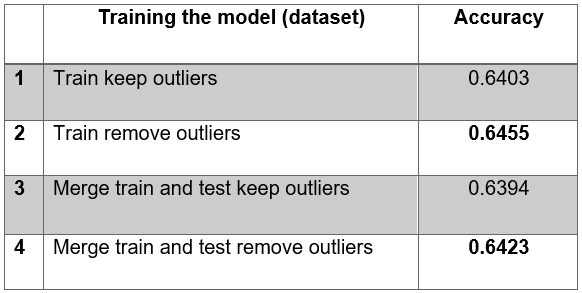

# Conclusion: 

Logistic regression model performed better with the train data without outlier on predicting the signal outcomes with the ***accuracy of 64.55%***